### IMPORT

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import platform
import koreanize_matplotlib
%matplotlib inline
# 운영체제별 폰트 설정
if platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")  # 윈도우: '맑은 고딕'
elif platform.system() == "Darwin":  # Mac OS
    plt.rc("font", family="AppleGothic")
else:  # Linux
    plt.rc("font", family="NanumGothic")    

# pp: Preprocess 약어
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
# pp: Preprocess 약어

## List (Categroy, drop...)

In [4]:
df_train = pd.read_csv("./train.csv")

df_test = pd.read_csv("./test.csv")

FileNotFoundError: [Errno 2] No such file or directory: './train.csv'

In [ ]:
drop_list = ['UID']

category_columns = ['채무 불이행 여부', '현재 미상환 신용액']

all_columns = df_train.select_dtypes(include=['number'])
num_columns = list(set(all_columns) - set(category_columns))

## Train 데이터 통계치 정리

In [ ]:
df_train.describe().round(2)

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2163958.88,0.20,12.25,19.88,1175264.74,0.63,30.89,0.37,506120.00,364912.62,22367.28,744.22,0.34
std,1434429.68,0.71,4.62,7.21,1604199.22,1.23,20.01,0.84,283146.23,353794.16,15186.50,57.00,0.47
min,267621.00,0.00,2.00,6.00,0.00,0.00,0.00,0.00,29176.50,0.00,0.00,502.00,0.00
25%,1311437.25,0.00,9.00,14.60,448247.62,0.00,14.00,0.00,300190.12,147185.62,10893.75,704.00,0.00
50%,1743222.75,0.00,12.00,17.95,767091.00,0.00,28.00,0.00,474341.25,254793.00,20160.00,756.00,0.00
75%,2447664.00,0.00,15.00,24.10,1147282.88,1.00,41.00,0.00,591907.88,474918.00,30647.25,793.00,1.00
max,17229747.00,7.00,35.00,51.70,23232333.00,7.00,88.00,3.00,1373613.00,3946300.50,153574.50,825.00,1.00


In [ ]:
for i in df_train.columns:
    print(i, df_train[i].unique(), df_train[i].dtype)
    print(" ")

UID ['TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... 'TRAIN_09997' 'TRAIN_09998'
 'TRAIN_09999'] object
 
주거 형태 ['자가' '월세' '주택 담보 대출 (거주 중)' '주택 담보 대출 (비거주 중)'] object
 
연간 소득 [1941337.5 1979505.  1356381.  ... 1221523.5 3343584.  2175133.5] float64
 
현재 직장 근속 연수 ['10년 이상' '4년' '6년' '2년' '8년' '3년' '5년' '9년' '7년' '1년 미만' '1년'] object
 
체납 세금 압류 횟수 [0. 1. 2. 4. 6. 5. 3. 7.] float64
 
개설된 신용계좌 수 [ 9  5 12 15 11 17  8  6 10 14 13 16 22  7 19 21 23 18  4 27 24 28 20  3
 26 30 29 25  2 32 31 33 35] int64
 
신용 거래 연수 [13.4 15.1 18.8 14.8 26.1 35.6 32.6 24.4  9.8 12.7 19.5 12.  14.9 33.9
 15.4 12.6 17.  16.9 39.2 17.8 27.7 15.7 30.5 31.4 11.3 15.5 14.7 17.6
 15.2 12.9 16.6 12.8  9.9 19.8 10.2 20.1 16.1 11.2 27.2 22.8 15.8 36.3
 18.4 26.9 13.7 13.1 13.5 18.  22.4 21.7 27.3 31.3 30.2 11.9 15.3 28.9
 29.6  9.1 27.6 16.  12.2 22.9 31.9 26.  23.3 18.6 27.4 21.4 23.2 10.6
 41.1 17.4 16.5 19.  28.6 29.1 14.6 32.1 18.3 26.3 15.9 15.6 28.2 19.1
 24.  18.2 26.6 26.4 16.7 29.3 11.  19.7 23.5 27.8 17.5 22.5 

### 전처리 시작

In [ ]:
num_columns

['신용 거래 연수',
 '최대 신용한도',
 '연간 소득',
 '월 상환 부채액',
 '개인 파산 횟수',
 '체납 세금 압류 횟수',
 '신용 문제 발생 횟수',
 '마지막 연체 이후 경과 개월 수',
 '현재 대출 잔액',
 '신용 점수',
 '개설된 신용계좌 수']

In [ ]:
RMV = ['채무 불이행 여부','UID','bucket','year_group']
FEATURES = [c for c in list( num_columns) if not c in RMV]


In [ ]:
INTERACT = []
for i,c1 in enumerate(FEATURES):
    for j,c2 in enumerate(FEATURES[i+1:]):
        n = f"{c1}_{c2}"
        df_train[n] = df_train[c1] * df_train[c2]
        df_test[n] = df_test[c1] * df_test[c2]
        INTERACT.append(n)
print(f"There are {len(INTERACT)} interaction features:")
print( INTERACT )

There are 55 interaction features:
['신용 거래 연수_최대 신용한도', '신용 거래 연수_연간 소득', '신용 거래 연수_월 상환 부채액', '신용 거래 연수_개인 파산 횟수', '신용 거래 연수_체납 세금 압류 횟수', '신용 거래 연수_신용 문제 발생 횟수', '신용 거래 연수_마지막 연체 이후 경과 개월 수', '신용 거래 연수_현재 대출 잔액', '신용 거래 연수_신용 점수', '신용 거래 연수_개설된 신용계좌 수', '최대 신용한도_연간 소득', '최대 신용한도_월 상환 부채액', '최대 신용한도_개인 파산 횟수', '최대 신용한도_체납 세금 압류 횟수', '최대 신용한도_신용 문제 발생 횟수', '최대 신용한도_마지막 연체 이후 경과 개월 수', '최대 신용한도_현재 대출 잔액', '최대 신용한도_신용 점수', '최대 신용한도_개설된 신용계좌 수', '연간 소득_월 상환 부채액', '연간 소득_개인 파산 횟수', '연간 소득_체납 세금 압류 횟수', '연간 소득_신용 문제 발생 횟수', '연간 소득_마지막 연체 이후 경과 개월 수', '연간 소득_현재 대출 잔액', '연간 소득_신용 점수', '연간 소득_개설된 신용계좌 수', '월 상환 부채액_개인 파산 횟수', '월 상환 부채액_체납 세금 압류 횟수', '월 상환 부채액_신용 문제 발생 횟수', '월 상환 부채액_마지막 연체 이후 경과 개월 수', '월 상환 부채액_현재 대출 잔액', '월 상환 부채액_신용 점수', '월 상환 부채액_개설된 신용계좌 수', '개인 파산 횟수_체납 세금 압류 횟수', '개인 파산 횟수_신용 문제 발생 횟수', '개인 파산 횟수_마지막 연체 이후 경과 개월 수', '개인 파산 횟수_현재 대출 잔액', '개인 파산 횟수_신용 점수', '개인 파산 횟수_개설된 신용계좌 수', '체납 세금 압류 횟수_신용 문제 발생 횟수', '체납 세금 압류 횟수_마지막 연체 이후 경과 개월 수', '체납 세금 압류 횟수_현재 대출 잔액', '체납 세금 압류 

In [25]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
import os
from pprint import pprint
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rc('font', family='Apple SD Gothic Neo')
plt.rcParams['axes.unicode_minus'] =False
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def get_clf_eval(y_true, y_pred, y_pred_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_probs)
    return accuracy, precision, recall, F1, auc


import seaborn as sns
import matplotlib.pyplot as plt

import platform
import koreanize_matplotlib
%matplotlib inline
# 운영체제별 폰트 설정
if platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")  # 윈도우: '맑은 고딕'
elif platform.system() == "Darwin":  # Mac OS
    plt.rc("font", family="AppleGothic")
else:  # Linux
    plt.rc("font", family="NanumGothic")    

# pp: Preprocess 약어
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, GroupKFold
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, SGDOneClassSVM


In [26]:
train = df_train.copy()
test = df_test.copy()
train['year_group'] = train['마지막 연체 이후 경과 개월 수']//20 


In [27]:
def first(df):
    df['최대 신용한도 대비 신용 점수'] = np.where(df['신용 점수'] ==0, -1, 
                                      df['최대 신용한도']/df['신용 점수'])
    
    df['최대 신용한도-현재 미상환 신용액'] =  df['최대 신용한도'] - df['현재 미상환 신용액']
    
    df['개인 파산 횟수 대비 신용 문제 발생 횟수'] = np.where((df['개인 파산 횟수'] + df['체납 세금 압류 횟수'])==0, -1, 
                                      df['신용 문제 발생 횟수']/(df['개인 파산 횟수'] + df['체납 세금 압류 횟수']))
    
    df['연간 소득 대비 현재 대출 잔액'] = np.where(df['연간 소득'] ==0, -1, 
                                      df['현재 대출 잔액']/df['연간 소득'])
    
    df['개설된 신용계좌 수 대비 현재 미상환 신용액'] = np.where(df['개설된 신용계좌 수'] ==0, -1, 
                                      df['현재 미상환 신용액']/df['개설된 신용계좌 수'])
    
    df['신용 거래 연수 대비 개설된 신용계좌 수'] = np.where(df['신용 거래 연수'] ==0, -1, 
                                      df['개설된 신용계좌 수']/df['신용 거래 연수'])
    
    df['신용 문제 발생 횟수+체납 세금 압류 횟수'] =  df['신용 문제 발생 횟수'] + df['체납 세금 압류 횟수']
    
    df['월 소득'] = df['연간 소득'] / 12
    # 🔹 대출금액 대비 소득 비율 추가
    df["대출금_소득비율"] = df["현재 대출 잔액"] / df["월 소득"]
    
    mapping = {
        '1년 미만': 0 , '1년': 1, '2년': 8, '3년': 27, '4년': 64, '5년': 125,
        '6년': 216, '7년': 343, '8년': 512, '9년': 729, '10년 이상': 1000
    }

    df["현재 직장 근속 연수num"] = df["현재 직장 근속 연수"].map(mapping)

    return df

first(df_train)
first(df_test)

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,...,최대 신용한도 대비 신용 점수,최대 신용한도-현재 미상환 신용액,개인 파산 횟수 대비 신용 문제 발생 횟수,연간 소득 대비 현재 대출 잔액,개설된 신용계좌 수 대비 현재 미상환 신용액,신용 거래 연수 대비 개설된 신용계좌 수,신용 문제 발생 횟수+체납 세금 압류 횟수,월 소득,대출금_소득비율,현재 직장 근속 연수num
0,TEST_0000,월세,1560090.0,10년 이상,0.0,13,12.0,495561.0,0,18,...,673.316576,362038.5,-1.0,0.241225,10270.961538,1.083333,0.0,130007.500,2.894695,1000
1,TEST_0001,주택 담보 대출 (거주 중),2102616.0,2년,0.0,9,29.0,580833.0,0,40,...,808.959610,277849.5,-1.0,0.394927,33664.833333,0.310345,0.0,175218.000,4.739119,8
2,TEST_0002,주택 담보 대출 (거주 중),2477989.5,10년 이상,0.0,11,26.5,995841.0,0,44,...,1379.281163,616563.0,-1.0,0.354172,34479.818182,0.415094,0.0,206499.125,4.250066,1000
3,TEST_0003,주택 담보 대출 (거주 중),1571091.0,6년,0.0,7,34.4,601656.0,0,45,...,789.574803,326260.5,-1.0,0.310153,39342.214286,0.203488,0.0,130924.250,3.721832,216
4,TEST_0004,주택 담보 대출 (거주 중),2290260.0,10년 이상,0.0,19,25.0,1954623.0,0,14,...,2522.094194,1211856.0,-1.0,0.173684,39093.000000,0.760000,0.0,190855.000,2.084211,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,TEST_2057,월세,698107.5,5년,0.0,5,7.7,77616.0,0,33,...,99.763496,64534.5,-1.0,0.277904,2616.300000,0.649351,0.0,58175.625,3.334850,125
2058,TEST_2058,주택 담보 대출 (거주 중),2092413.0,10년 이상,0.0,15,27.2,2162094.0,0,35,...,2689.171642,1417047.0,-1.0,0.540355,49669.800000,0.551471,0.0,174367.750,6.484261,1000
2059,TEST_2059,자가,2052000.0,10년 이상,0.0,20,26.7,1346763.0,0,69,...,1910.302128,570964.5,-1.0,0.499744,38789.925000,0.749064,0.0,171000.000,5.996930,1000
2060,TEST_2060,주택 담보 대출 (거주 중),4249777.5,6년,0.0,18,21.3,420255.0,0,6,...,571.775510,256921.5,-1.0,0.154386,9074.083333,0.845070,0.0,354148.125,1.852632,216


In [28]:

# 변경된 리스트
additional_num_columns = [ 

]

num_columns.extend(additional_num_columns)

# 중복 제거 (혹시라도 중복된 컬럼이 있을 경우)
num_columns = list(set(num_columns))

print(" num_columns 리스트 업데이트 완료:", num_columns)


 num_columns 리스트 업데이트 완료: ['신용 거래 연수', '최대 신용한도', '연간 소득', '월 상환 부채액', '개인 파산 횟수', '체납 세금 압류 횟수', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '현재 대출 잔액', '신용 점수', '개설된 신용계좌 수']


In [29]:
def convert_type(df):
    """
    컬럼 타입을 자동 변환하는 함수.
    - 기존 `category` 타입이 아니면 `sub_num_columns`에 추가
    - 기존 `numeric` 타입이 아니면 `sub_category_columns`에 추가

    :param df: pandas DataFrame
    :return: 변환된 DataFrame
    """

    global category_columns, num_columns
    sub_category_columns = category_columns.copy()
    sub_num_columns = num_columns.copy()

    df = df.copy()  # 원본 데이터 손상 방지

    # 
    # _list에 있는 column들은 변환 리스트에서 제외
    sub_category_columns = [x for x in category_columns if x not in drop_list]
    sub_num_columns = [x for x in num_columns if x not in drop_list]

    # 컬럼 타입 변환
    for col in df.columns:
        if col in sub_category_columns:
            # 기존 dtype이 category가 아닌 경우 category로 변환
            if not pd.api.types.is_categorical_dtype(df[col]):
                df[col] = df[col].astype(str).astype('category')
                sub_num_columns.append(col)  # 🚀 category가 아니었으므로 숫자 컬럼 리스트에 추가

        elif col in sub_num_columns:
            # 기존 dtype이 numeric이 아닌 경우 float로 변환
            if not pd.api.types.is_numeric_dtype(df[col]):
                df[col] = pd.to_numeric(df[col], errors='coerce')
                sub_category_columns.append(col)  # 🚀 숫자가 아니었으므로 category 컬럼 리스트에 추가

        else:
            print(f"⚠️ column: {col} is not in category_columns or num_columns list")

    return df


In [30]:
df_train = convert_type(df_train)
df_test = convert_type(df_test)


⚠️ column: UID is not in category_columns or num_columns list
⚠️ column: 주거 형태 is not in category_columns or num_columns list
⚠️ column: 현재 직장 근속 연수 is not in category_columns or num_columns list
⚠️ column: 대출 목적 is not in category_columns or num_columns list
⚠️ column: 대출 상환 기간 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_최대 신용한도 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_연간 소득 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_월 상환 부채액 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_개인 파산 횟수 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_체납 세금 압류 횟수 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_신용 문제 발생 횟수 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_마지막 연체 이후 경과 개월 수 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_현재 대출 잔액 is not in category_columns or num_columns list
⚠️ column: 신용 거래 연수_신용 점수 is not in category_columns o

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   UID                            10000 non-null  object  
 1   주거 형태                          10000 non-null  object  
 2   연간 소득                          10000 non-null  float64 
 3   현재 직장 근속 연수                    10000 non-null  object  
 4   체납 세금 압류 횟수                    10000 non-null  float64 
 5   개설된 신용계좌 수                     10000 non-null  int64   
 6   신용 거래 연수                       10000 non-null  float64 
 7   최대 신용한도                        10000 non-null  float64 
 8   신용 문제 발생 횟수                    10000 non-null  int64   
 9   마지막 연체 이후 경과 개월 수              10000 non-null  int64   
 10  개인 파산 횟수                       10000 non-null  int64   
 11  대출 목적                          10000 non-null  object  
 12  대출 상환 기간                       10

In [32]:
# 로그 변환
log_columns = [ "월 상환 부채액", "현재 대출 잔액","개설된 신용계좌 수", "연간 소득", "신용 거래 연수"] #"개설된 신용계좌 수", "연간 소득", "신용 거래 연수"
for col in log_columns:
    df_train[f'{col}_scaled'] = np.log1p(df_train[[col]])
    df_test[f'{col}_scaled'] = np.log1p(df_test[[col]])
    num_columns.append(f'{col}_scaled')

### Feature Select Auto

In [33]:
RMV = ['채무 불이행 여부','UID','bucket','year_group']
FEATURES = [c for c in list( num_columns) if not c in RMV]


INTERACT = []
for i,c1 in enumerate(FEATURES):
    for j,c2 in enumerate(FEATURES[i+1:]):
        n = f"{c1}_{c2}"
        df_train[n] = df_train[c1] * df_train[c2]
        df_test[n] = df_test[c1] * df_test[c2]
        INTERACT.append(n)
print(f"There are {len(INTERACT)} interaction features:")
print( INTERACT )

There are 120 interaction features:
['신용 거래 연수_최대 신용한도', '신용 거래 연수_연간 소득', '신용 거래 연수_월 상환 부채액', '신용 거래 연수_개인 파산 횟수', '신용 거래 연수_체납 세금 압류 횟수', '신용 거래 연수_신용 문제 발생 횟수', '신용 거래 연수_마지막 연체 이후 경과 개월 수', '신용 거래 연수_현재 대출 잔액', '신용 거래 연수_신용 점수', '신용 거래 연수_개설된 신용계좌 수', '신용 거래 연수_월 상환 부채액_scaled', '신용 거래 연수_현재 대출 잔액_scaled', '신용 거래 연수_개설된 신용계좌 수_scaled', '신용 거래 연수_연간 소득_scaled', '신용 거래 연수_신용 거래 연수_scaled', '최대 신용한도_연간 소득', '최대 신용한도_월 상환 부채액', '최대 신용한도_개인 파산 횟수', '최대 신용한도_체납 세금 압류 횟수', '최대 신용한도_신용 문제 발생 횟수', '최대 신용한도_마지막 연체 이후 경과 개월 수', '최대 신용한도_현재 대출 잔액', '최대 신용한도_신용 점수', '최대 신용한도_개설된 신용계좌 수', '최대 신용한도_월 상환 부채액_scaled', '최대 신용한도_현재 대출 잔액_scaled', '최대 신용한도_개설된 신용계좌 수_scaled', '최대 신용한도_연간 소득_scaled', '최대 신용한도_신용 거래 연수_scaled', '연간 소득_월 상환 부채액', '연간 소득_개인 파산 횟수', '연간 소득_체납 세금 압류 횟수', '연간 소득_신용 문제 발생 횟수', '연간 소득_마지막 연체 이후 경과 개월 수', '연간 소득_현재 대출 잔액', '연간 소득_신용 점수', '연간 소득_개설된 신용계좌 수', '연간 소득_월 상환 부채액_scaled', '연간 소득_현재 대출 잔액_scaled', '연간 소득_개설된 신용계좌 수_scaled', '연간 소득_연간 소득_scaled', '연간 소득_신용 거래 연수_scaled

In [34]:
ADD  = []
best_auc = 0
best_oof = None
best_pred = None

train = df_train.copy()
test = df_test.copy()
train['year_group'] = train['마지막 연체 이후 경과 개월 수']//10
# FORWARD FEATURE SELECTION 
for k,col in enumerate(['baseline']+INTERACT):

    FOLDS = train.year_group.nunique()
    kf = GroupKFold(n_splits=FOLDS) 
    
    oof_svc = np.zeros(len(train))
    pred_svc = np.zeros(len(test))

    if col!='baseline': ADD.append(col)

    # GROUP K FOLD USING YEAR AS GROUP
    for i, (train_index, test_index) in enumerate(kf.split(train,groups=train.year_group)):
        #print("#"*25)
        #print(f"### Fold {i+1}")
        #print("#"*25)

        # TRAIN AND VALID DATA
        x_train = train.loc[train_index,num_columns+ADD ].copy()
        y_train = train.loc[train_index,"채무 불이행 여부"]
        x_valid = train.loc[test_index,num_columns+ADD ].copy()
        y_valid = train.loc[test_index,"채무 불이행 여부"]
        x_test = test[num_columns+ADD ].copy()

        # SVC WANTS STANDARIZED num_columns
        for c in num_columns+ADD:
            m = x_train[c].mean()
            s = x_train[c].std()
            x_train[c] = (x_train[c]-m)/s
            x_valid[c] = (x_valid[c]-m)/s
            x_test[c] = (x_test[c]-m)/s
            x_test[c] = x_test[c].fillna(0)

        # TRAIN SVC MODEL
        #model = SVC(C=0.1, probability=True, kernel='poly', degree=1)

        # ✅ SVC 사용 (확률 예측 가능)
        model = LogisticRegression(C=4, random_state=2024)  # LinearSVC 대신 linear kernel 사용
        model.fit(x_train, y_train)
    
        # INFER OOF
        oof_svc[test_index] = model.predict_proba(x_valid.values)[:,1]
        # INFER TEST
        pred_svc += model.predict_proba(x_test.values)[:,1]
    
    # COMPUTE AVERAGE TEST PREDS
    pred_svc /= FOLDS

    # COMPUTE CV VALIDATION AUC SCORE
    true = train['채무 불이행 여부'].values
    m = roc_auc_score(true, oof_svc)
    
    if m>best_auc:
        print(f"NEW BEST with {col} at {m}")
        best_auc = m
        best_oof = oof_svc.copy()
        best_pred = pred_svc.copy()
    else:
        print(f"Worse with {col} at {m}")
        ADD.remove(col)

NEW BEST with baseline at 0.699686443645806
Worse with 신용 거래 연수_최대 신용한도 at 0.6996013836660637
Worse with 신용 거래 연수_연간 소득 at 0.6995683739877329
NEW BEST with 신용 거래 연수_월 상환 부채액 at 0.6997421864044969
NEW BEST with 신용 거래 연수_개인 파산 횟수 at 0.6998712444595346
Worse with 신용 거래 연수_체납 세금 압류 횟수 at 0.699673586776483
NEW BEST with 신용 거래 연수_신용 문제 발생 횟수 at 0.7000681013687183
Worse with 신용 거래 연수_마지막 연체 이후 경과 개월 수 at 0.6998897067459325
Worse with 신용 거래 연수_현재 대출 잔액 at 0.7000089775648075
Worse with 신용 거래 연수_신용 점수 at 0.7000677454692215
Worse with 신용 거래 연수_개설된 신용계좌 수 at 0.6999819736904856
NEW BEST with 신용 거래 연수_월 상환 부채액_scaled at 0.700127625559563
NEW BEST with 신용 거래 연수_현재 대출 잔액_scaled at 0.7002039660016328
Worse with 신용 거래 연수_개설된 신용계좌 수_scaled at 0.7000480820220216
Worse with 신용 거래 연수_연간 소득_scaled at 0.7000238363688003
Worse with 신용 거래 연수_신용 거래 연수_scaled at 0.7001738035192766
Worse with 최대 신용한도_연간 소득 at 0.7001292715947358
NEW BEST with 최대 신용한도_월 상환 부채액 at 0.7005974573828148
Worse with 최대 신용한도_개인 파산 횟수 at 0.7

In [35]:
INTERACT

['신용 거래 연수_최대 신용한도',
 '신용 거래 연수_연간 소득',
 '신용 거래 연수_월 상환 부채액',
 '신용 거래 연수_개인 파산 횟수',
 '신용 거래 연수_체납 세금 압류 횟수',
 '신용 거래 연수_신용 문제 발생 횟수',
 '신용 거래 연수_마지막 연체 이후 경과 개월 수',
 '신용 거래 연수_현재 대출 잔액',
 '신용 거래 연수_신용 점수',
 '신용 거래 연수_개설된 신용계좌 수',
 '신용 거래 연수_월 상환 부채액_scaled',
 '신용 거래 연수_현재 대출 잔액_scaled',
 '신용 거래 연수_개설된 신용계좌 수_scaled',
 '신용 거래 연수_연간 소득_scaled',
 '신용 거래 연수_신용 거래 연수_scaled',
 '최대 신용한도_연간 소득',
 '최대 신용한도_월 상환 부채액',
 '최대 신용한도_개인 파산 횟수',
 '최대 신용한도_체납 세금 압류 횟수',
 '최대 신용한도_신용 문제 발생 횟수',
 '최대 신용한도_마지막 연체 이후 경과 개월 수',
 '최대 신용한도_현재 대출 잔액',
 '최대 신용한도_신용 점수',
 '최대 신용한도_개설된 신용계좌 수',
 '최대 신용한도_월 상환 부채액_scaled',
 '최대 신용한도_현재 대출 잔액_scaled',
 '최대 신용한도_개설된 신용계좌 수_scaled',
 '최대 신용한도_연간 소득_scaled',
 '최대 신용한도_신용 거래 연수_scaled',
 '연간 소득_월 상환 부채액',
 '연간 소득_개인 파산 횟수',
 '연간 소득_체납 세금 압류 횟수',
 '연간 소득_신용 문제 발생 횟수',
 '연간 소득_마지막 연체 이후 경과 개월 수',
 '연간 소득_현재 대출 잔액',
 '연간 소득_신용 점수',
 '연간 소득_개설된 신용계좌 수',
 '연간 소득_월 상환 부채액_scaled',
 '연간 소득_현재 대출 잔액_scaled',
 '연간 소득_개설된 신용계좌 수_scaled',
 '연간 소득_연간 소득_scaled',
 '연간 소득_신용 거래 연수_s

In [36]:
ADD

['신용 거래 연수_월 상환 부채액',
 '신용 거래 연수_개인 파산 횟수',
 '신용 거래 연수_신용 문제 발생 횟수',
 '신용 거래 연수_월 상환 부채액_scaled',
 '신용 거래 연수_현재 대출 잔액_scaled',
 '최대 신용한도_월 상환 부채액',
 '최대 신용한도_체납 세금 압류 횟수',
 '최대 신용한도_마지막 연체 이후 경과 개월 수',
 '최대 신용한도_현재 대출 잔액',
 '연간 소득_체납 세금 압류 횟수',
 '월 상환 부채액_체납 세금 압류 횟수',
 '월 상환 부채액_신용 문제 발생 횟수',
 '월 상환 부채액_신용 점수',
 '월 상환 부채액_개설된 신용계좌 수',
 '개인 파산 횟수_신용 문제 발생 횟수',
 '개인 파산 횟수_현재 대출 잔액',
 '개인 파산 횟수_현재 대출 잔액_scaled',
 '체납 세금 압류 횟수_신용 점수',
 '체납 세금 압류 횟수_현재 대출 잔액_scaled',
 '신용 문제 발생 횟수_현재 대출 잔액',
 '신용 문제 발생 횟수_개설된 신용계좌 수_scaled',
 '마지막 연체 이후 경과 개월 수_신용 점수',
 '마지막 연체 이후 경과 개월 수_월 상환 부채액_scaled',
 '현재 대출 잔액_현재 대출 잔액_scaled',
 '신용 점수_개설된 신용계좌 수',
 '개설된 신용계좌 수_월 상환 부채액_scaled',
 '개설된 신용계좌 수_현재 대출 잔액_scaled']

### 선택 안된 컬럼 드롭

In [37]:
remove_list = list(set(INTERACT)- set(ADD))
def remove_columns(df, remove_list):
    """
    데이터프레임에서 특정 컬럼을 삭제하는 함수
    :param df: 원본 데이터프레임
    :param remove_list: 삭제할 컬럼 리스트
    :return: 컬럼이 삭제된 새로운 데이터프레임
    """
    df = df.drop(columns=remove_list, errors='ignore')  # errors='ignore' → 존재하지 않는 컬럼 무시
    return df

# 사용 예시
df_train = remove_columns(df_train, remove_list)
df_test = remove_columns(df_test, remove_list)


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 60 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   UID                                10000 non-null  object  
 1   주거 형태                              10000 non-null  object  
 2   연간 소득                              10000 non-null  float64 
 3   현재 직장 근속 연수                        10000 non-null  object  
 4   체납 세금 압류 횟수                        10000 non-null  float64 
 5   개설된 신용계좌 수                         10000 non-null  int64   
 6   신용 거래 연수                           10000 non-null  float64 
 7   최대 신용한도                            10000 non-null  float64 
 8   신용 문제 발생 횟수                        10000 non-null  int64   
 9   마지막 연체 이후 경과 개월 수                  10000 non-null  int64   
 10  개인 파산 횟수                           10000 non-null  int64   
 11  대출 목적                              10000 n

In [39]:
import pandas as pd

drop_list.append('현재 미상환 신용액')
drop_list.append('대출 목적_휴가 비용')
def update_column_types_with_drop(df, drop_list):
    """
    전역 리스트(category_columns, num_columns)에 없는 컬럼을 dtype에 따라 자동으로 추가하는 함수.
    또한 drop_list에 있는 컬럼을 제거.

    :param df: pandas DataFrame
    :param drop_list: 제거할 컬럼 리스트
    :return: 업데이트된 category_columns, num_columns 리스트, drop된 df
    """

    global category_columns, num_columns

    # 기존 리스트 복사
    updated_category_columns = [col for col in category_columns if col not in drop_list]
    updated_num_columns = [col for col in num_columns if col not in drop_list]

    # df의 모든 컬럼을 검사하여 없던 컬럼을 자동으로 추가
    for col in df.columns:
        if col not in updated_category_columns and col not in updated_num_columns and col not in drop_list:
            if pd.api.types.is_numeric_dtype(df[col]):  # 숫자형 컬럼인지 확인
                updated_num_columns.append(col)
            elif pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_categorical_dtype(df[col]):  # 문자형인지 확인
                updated_category_columns.append(col)

    # drop_list에 있는 컬럼을 제거한 df 생성
    df = df.drop(columns=drop_list, errors='ignore')  # 🚀 존재하지 않는 컬럼이 있어도 에러 방지

    return df, updated_category_columns, updated_num_columns


In [40]:
df_train['현재 직장 근속 연수num'].unique()

array([1000,   64,  216,    8,  512,   27,  125,  729,  343,    0,    1],
      dtype=int64)

### 원핫 인코딩

In [41]:
# '채무 불이행 여부' 제외하고 원-핫 인코딩 적용

df_train, updated_category_columns, updated_num_columns = update_column_types_with_drop(df_train, drop_list)
df_test, updated_category_columns, updated_num_columns = update_column_types_with_drop(df_test, drop_list)

df_train_encoded = pd.get_dummies(df_train, columns=[col for col in updated_category_columns if col != "채무 불이행 여부"])
df_test_encoded = pd.get_dummies(df_test, columns=[col for col in updated_category_columns if col != "채무 불이행 여부"])

# df_test_encoded를 df_train_encoded의 컬럼과 맞추되, '채무 불이행 여부' 제외
df_test_encoded = df_test_encoded.reindex(columns=[col for col in df_train_encoded.columns if col != "채무 불이행 여부"], fill_value=0)

# bool 타입을 int(0, 1)로 변환
df_train_encoded = df_train_encoded.astype(int)
df_test_encoded = df_test_encoded.astype(int)

# '채무 불이행 여부' 컬럼을 유지 (df_train만 적용)
df_train_encoded["채무 불이행 여부"] = df_train["채무 불이행 여부"]

# 원본 데이터프레임과 결합
df_train = df_train_encoded.copy()
df_test = df_test_encoded.copy()

# drop_list 적용
df_train, updated_category_columns, updated_num_columns = update_column_types_with_drop(df_train, drop_list)
df_test, updated_category_columns, updated_num_columns = update_column_types_with_drop(df_test, drop_list)

# ✅ 확인
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)  # 🚀 이제 df_test에는 '채무


Train shape: (10000, 84)
Test shape: (2062, 83)


In [42]:
def convert_category_columns(df, category_columns): # catboost 확인용 
    """
    CatBoost에서 오류가 발생하지 않도록 category 컬럼을 string으로 변환.

    :param df: pandas DataFrame
    :param category_columns: 범주형 컬럼 리스트
    :return: 변환된 DataFrame
    """
    df = df.copy()

    for col in category_columns:
        if col in df.columns:
            df[col] = df[col].astype(str)  # 모든 값을 문자열로 변환

    return df

df_train = convert_category_columns(df_train, category_columns)
df_test = convert_category_columns(df_test, category_columns)

In [43]:
df_train['채무 불이행 여부'] = df_train['채무 불이행 여부'].astype(int)

In [44]:

df_numeric = df_train.select_dtypes(include=['number'])
corr = df_numeric.corr()
target_col = "채무 불이행 여부"

target_corr = abs(corr[target_col].drop(target_col)).sort_values(ascending=False)

# 하위 10개 변수 출력
bottom_10_corr = target_corr.head(50)

print("채무 불이행 여부와 상관관계가 높은(절댓값) 10개 변수:")
print(bottom_10_corr)
bottom_10_corr.mean() #6개 로그변환

채무 불이행 여부와 상관관계가 높은(절댓값) 10개 변수:
대출 목적_부채 통합                      0.198585
개설된 신용계좌 수                       0.169900
개설된 신용계좌 수_현재 대출 잔액_scaled       0.163749
개설된 신용계좌 수_월 상환 부채액_scaled       0.152856
신용 거래 연수 대비 개설된 신용계좌 수           0.150202
신용 점수_개설된 신용계좌 수                 0.141877
월 소득                             0.120499
연간 소득                            0.120499
개인 파산 횟수                         0.115900
개인 파산 횟수_현재 대출 잔액_scaled         0.115826
대출금_소득비율                         0.115418
대출 상환 기간_단기 상환                   0.113358
대출 상환 기간_장기 상환                   0.113358
연간 소득_scaled                     0.112027
대출 목적_주택 개보수                     0.110903
개설된 신용계좌 수_scaled                0.110522
신용 거래 연수                         0.108810
신용 거래 연수_현재 대출 잔액_scaled         0.104916
신용 거래 연수_scaled                  0.102821
현재 직장 근속 연수_8년                   0.097315
신용 거래 연수_개인 파산 횟수                0.095905
신용 점수                            0.095783
신용 거래 연수_월 상환 부채액_scaled         0.090319
현

0.08727976543384948

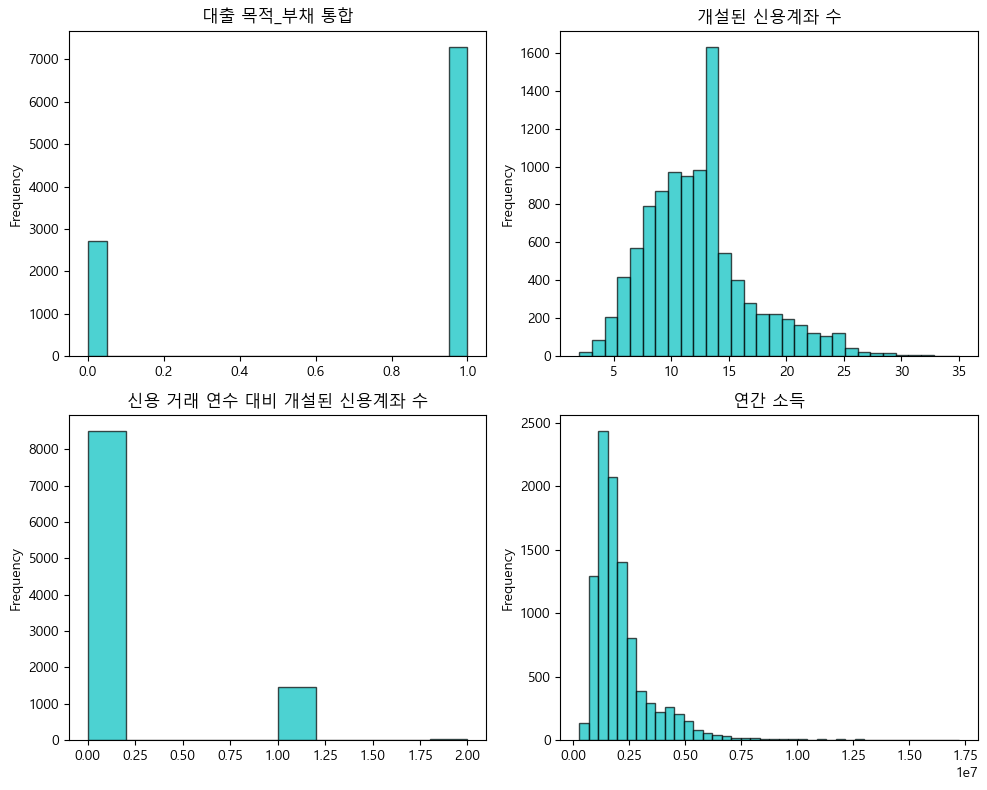

In [45]:
df_train['대출 목적_부채 통합']

df = df_train.copy()

vars_to_plot = ['대출 목적_부채 통합', '개설된 신용계좌 수', '신용 거래 연수 대비 개설된 신용계좌 수', '연간 소득']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, var, bins in zip(axes.flatten(), vars_to_plot, [20, 30, 10, 40]):
    df[var].plot.hist(ax=ax, bins=bins, alpha=0.7, edgecolor='black', color='c')
    ax.set_title(var)

plt.tight_layout()
plt.show()



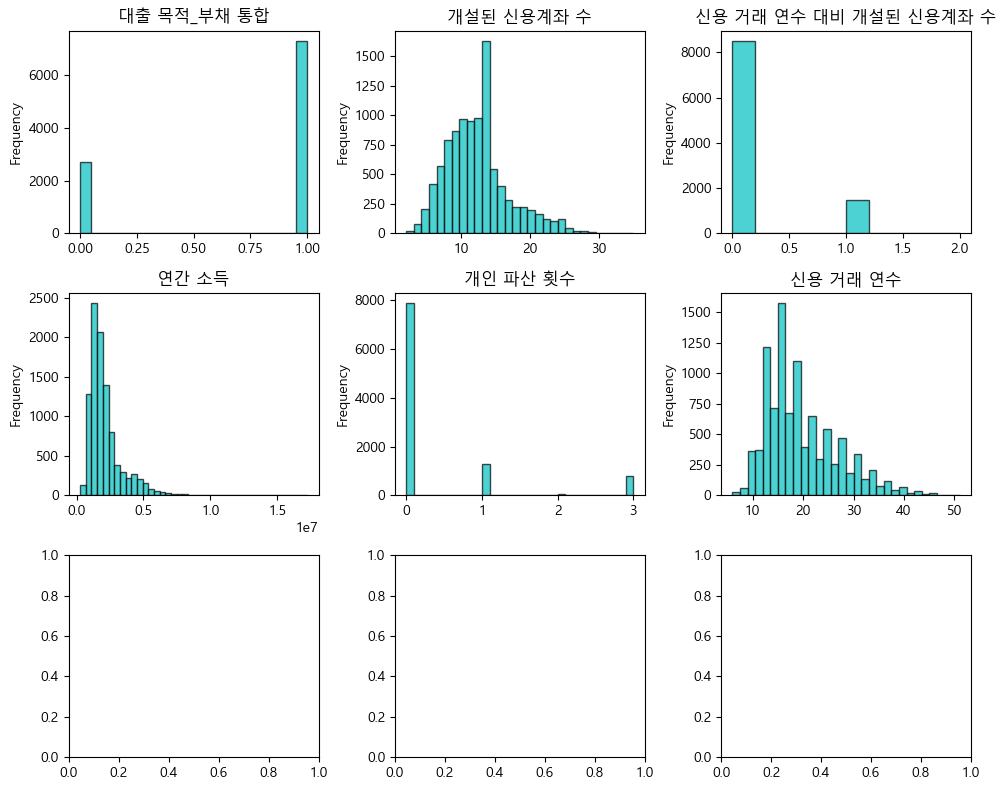

In [46]:
df_train['대출 목적_부채 통합']

df = df_train.copy()

vars_to_plot = ['대출 목적_부채 통합', '개설된 신용계좌 수', '신용 거래 연수 대비 개설된 신용계좌 수', '연간 소득', '개인 파산 횟수', '신용 거래 연수']

fig, axes = plt.subplots(3, 3, figsize=(10, 8))

for ax, var, bins in zip(axes.flatten(), vars_to_plot, [20, 30, 10, 40, 30, 30, 30, 30]):
    df[var].plot.hist(ax=ax, bins=bins, alpha=0.7, edgecolor='black', color='c')
    ax.set_title(var)

plt.tight_layout()
plt.show()



### After scaled

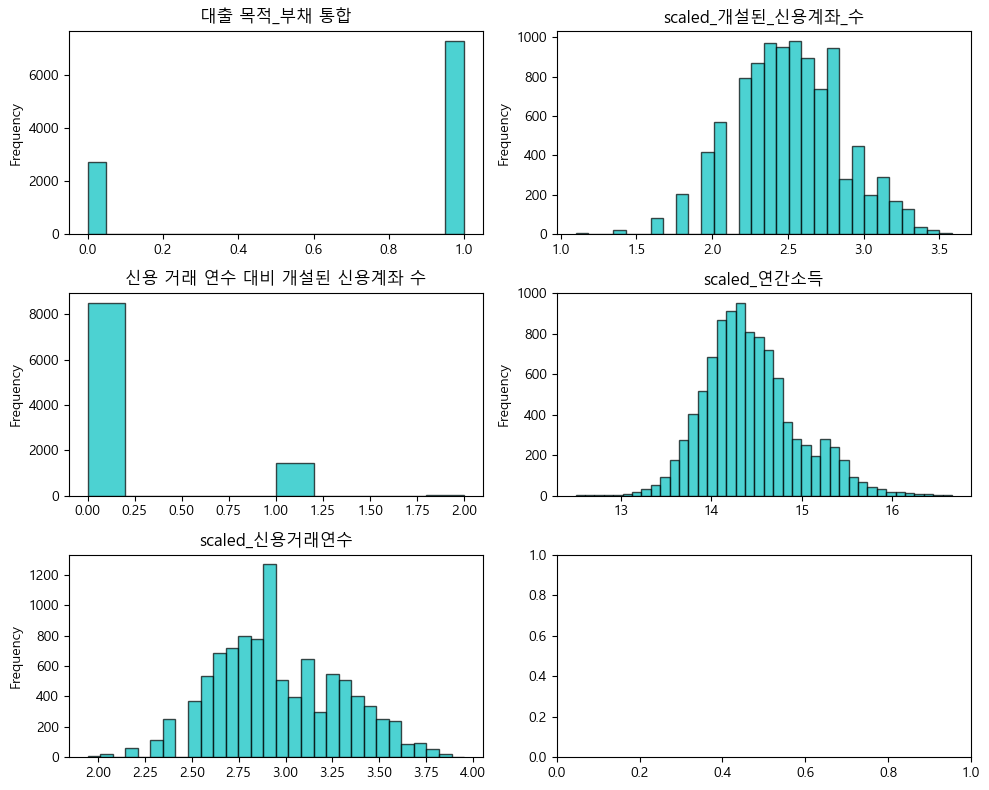

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df["scaled_개설된_신용계좌_수"] = np.log1p(df[["개설된 신용계좌 수"]])
df["scaled_연간소득"] = np.log1p(df[["연간 소득"]])
df["scaled_신용거래연수"] = np.log1p(df[["신용 거래 연수"]])

df["scaled_개설된 신용계좌 수 대비 현재 미상환 신용액"] = np.log1p(df[["개설된 신용계좌 수 대비 현재 미상환 신용액"]])

vars_to_plot = ['대출 목적_부채 통합', 'scaled_개설된_신용계좌_수', '신용 거래 연수 대비 개설된 신용계좌 수', 'scaled_연간소득', 'scaled_신용거래연수']

fig, axes = plt.subplots(3, 2, figsize=(10, 8))

for ax, var, bins in zip(axes.flatten(), vars_to_plot, [20, 30, 10, 40, 30, 30]):
    df[var].plot.hist(ax=ax, bins=bins, alpha=0.7, edgecolor='black', color='c')
    ax.set_title(var)

plt.tight_layout()
plt.show()



### CORR SCORE

In [48]:

corr = df_numeric.corr()
target_col = "채무 불이행 여부"

target_corr = abs(corr[target_col].drop(target_col)).sort_values(ascending=False)

# 하위 10개 변수 출력
bottom_10_corr = target_corr.head(80)

print("채무 불이행 여부와 상관관계가 높은(절댓값) 10개 변수:")
print(bottom_10_corr)


채무 불이행 여부와 상관관계가 높은(절댓값) 10개 변수:
대출 목적_부채 통합                   0.198585
개설된 신용계좌 수                    0.169900
개설된 신용계좌 수_현재 대출 잔액_scaled    0.163749
개설된 신용계좌 수_월 상환 부채액_scaled    0.152856
신용 거래 연수 대비 개설된 신용계좌 수        0.150202
                                ...   
월 상환 부채액_신용 문제 발생 횟수          0.014400
대출 목적_이사 비용                   0.014396
현재 직장 근속 연수_7년                0.013827
대출 목적_교육비                     0.012467
마지막 연체 이후 경과 개월 수             0.012058
Name: 채무 불이행 여부, Length: 80, dtype: float64


In [49]:
def fillna(df):
    for i in df.columns :
        df[i] = df[i].fillna(0)

    return df

fillna(df_train)
fillna(df_test)

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,월 상환 부채액,...,대출 목적_사업 대출,대출 목적_소규모 사업 자금,대출 목적_여행 자금,대출 목적_의료비,대출 목적_이사 비용,대출 목적_자동차 구매,대출 목적_주택 개보수,대출 목적_주택 구매,대출 상환 기간_단기 상환,대출 상환 기간_장기 상환
0,1560090,0,13,12,495561,0,18,0,376332,29641,...,0,0,0,0,0,0,0,0,1,0
1,2102616,0,9,29,580833,0,40,0,830379,20151,...,0,0,0,0,0,0,0,0,0,1
2,2477989,0,11,26,995841,0,44,0,877635,13113,...,0,0,0,0,0,0,0,0,0,1
3,1571091,0,7,34,601656,0,45,0,487278,11679,...,0,0,0,0,0,0,0,0,1,0
4,2290260,0,19,25,1954623,0,14,0,397782,42370,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,698107,0,5,7,77616,0,33,0,194007,20302,...,0,0,0,0,0,0,1,0,1,0
2058,2092413,0,15,27,2162094,0,35,0,1130646,25458,...,0,0,0,0,0,0,0,0,1,0
2059,2052000,0,20,26,1346763,0,69,0,1025475,44802,...,0,0,0,0,0,0,0,0,1,0
2060,4249777,0,18,21,420255,0,6,0,656106,91725,...,0,0,0,0,0,0,0,0,1,0


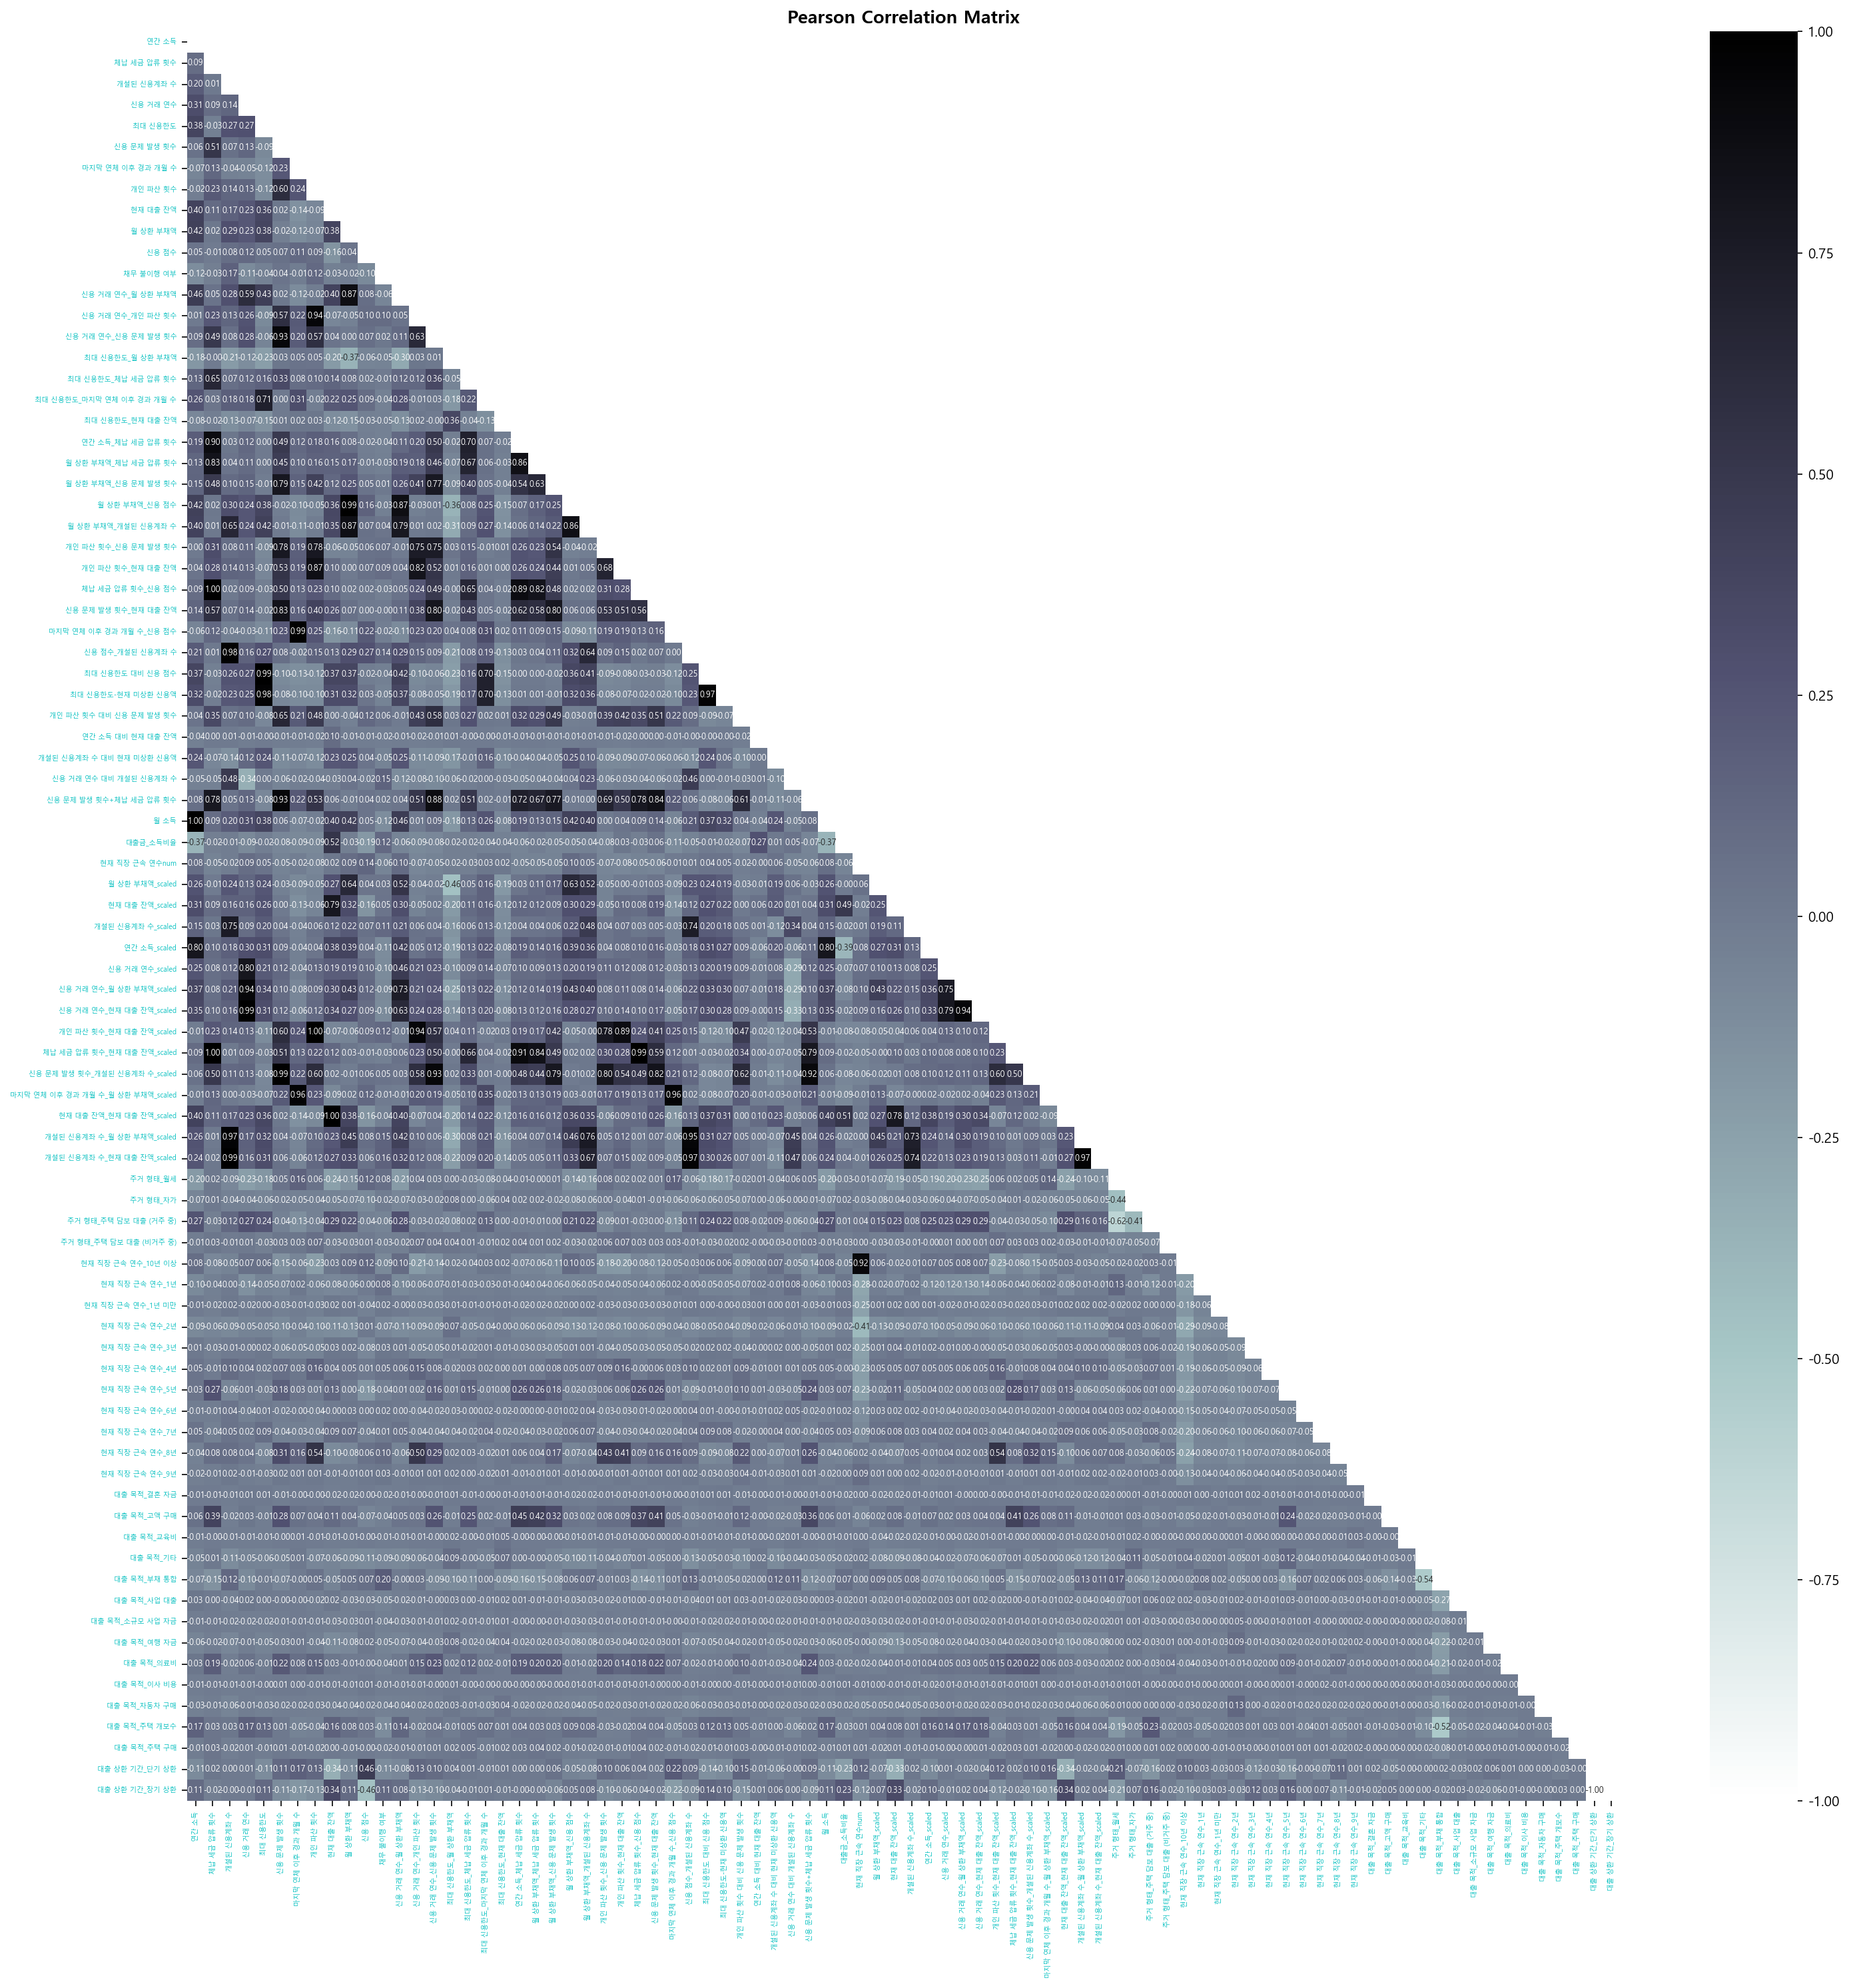

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
# 숫자형 컬럼만 선택
df_numeric = df_train.select_dtypes(include=['number'])

# 상관 행렬 계산
corr = df_numeric.corr()

# 상삼각행렬 마스킹
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(20, 20), dpi=150)
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', annot_kws={'fontsize':6}, cmap=plt.cm.bone_r)
plt.tick_params(size=4, labelsize=5, labelcolor='c')
plt.title('Pearson Correlation Matrix', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


## Logistic Regression Model

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.ensemble import ExtraTreesClassifier
import os
from pprint import pprint
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tqdm import tqdm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.rc('font', family='Apple SD Gothic Neo')
plt.rcParams['axes.unicode_minus'] =False
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

def get_clf_eval(y_true, y_pred, y_pred_probs):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_probs)
    return accuracy, precision, recall, F1, auc



### Train split

In [52]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df_train.drop(columns=["채무 불이행 여부"])  # 특성 데이터
y = df_train["채무 불이행 여부"].astype(int) # 타겟 변수 (0 또는 1)
# 훈련/테스트 데이터 분리 (80% 훈련, 20% 테스트)
smote = SMOTE(random_state=2024)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=2024, stratify=y_resampled)

### Grid Search & Val Test (Monitor AUC Score!)

In [53]:
y_train.dtype

dtype('int32')

In [54]:

# 1. 데이터 스케일링 적용 (Logistic Regression은 스케일링 필수)
scaler = StandardScaler()

# 2. 하이퍼파라미터 후보 설정
param_grid = {
    "logistic__penalty": ["l1", "l2"],  # 정규화 방식
    "logistic__C": np.logspace(-5, 2, 10),  # 로그 스케일로 C 범위 조정
    "logistic__solver": ["liblinear", "saga"],  # 최적화 알고리즘
    "logistic__max_iter": [100, 200, 500],  # 반복 횟수
}

# 4. Logistic Regression을 Pipeline으로 설정 (스케일링 포함)
pipeline = Pipeline([
    ("scaler", scaler),
    ("logistic", LogisticRegression(random_state=2024))
])

# 5. GridSearchCV 실행
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring="roc_auc", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# 6. 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# 7. 최적 모델 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# ✅ 정확도, 정밀도, 재현율, F1 Score 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")


Fitting 10 folds for each of 120 candidates, totalling 1200 fits
Best Hyperparameters: {'logistic__C': 0.4641588833612782, 'logistic__max_iter': 100, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}
Accuracy: 0.7855
Precision: 0.8662
Recall: 0.6751
F1 Score: 0.7588
AUC Score: 0.7855


In [ ]:
Accuracy: 0.7886
Precision: 0.8626
Recall: 0.6862
F1 Score: 0.7644
AUC Score: 0.7885

### Make Submission File

In [55]:

y_pred_prob = best_model.predict_proba(df_test)[:, 1]

OUTPUT_NAME = './test48.csv'
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("./sample_submission.csv")
df_sub['채무 불이행 확률'] = y_pred_prob

# 제출 파일 저장
df_sub.to_csv(OUTPUT_NAME, index=False)

### Ensemble Not yet

In [ ]:

# CSV 파일 불러오기

df1 = pd.read_csv("test29_cat.csv")  
df2 = pd.read_csv("test29_Lr.csv")  
# 두 개의 확률 값 평균 계산 (각 행 기준)
df_avg = df1.copy()
df_avg["채무 불이행 확률"] = (df1["채무 불이행 확률"] +df2["채무 불이행 확률"]) / 2
# 새로운 CSV 파일로 저장
df_avg.to_csv("ensemble10.csv", index=False)

print("앙상블 평균 확률 CSV 파일이 생성되었습니다: ensemble8.csv")
